# Australian Gridded Climate Data ( AGCD )

### url =  http://www.bom.gov.au/metadata/catalogue/19115/ANZCW0503900567

In [1]:
import pathlib

In [2]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt

In [3]:
varname = 'tmax' # or 'tmin', 'tmax', 'precip'
stat = 'mean' # 'mean' for tmin and tmax, 'total' for precip 
new_varname = 'TMax'

In [4]:
url_root = f"https://dapds00.nci.org.au/thredds/dodsC/zv2/agcd/v1/{varname}/{stat}/r005/01month/" 

In [5]:
dsets = []
for year in np.arange(1948, 2020): 
    fname = f"agcd_v1_{varname}_{stat}_r005_monthly_{year}.nc"
    url = url_root + fname 
    dset = xr.open_dataset(url)
    if 'nv' in dset.data_vars.keys(): 
        dset = dset.drop('nv') 
        
    dset = dset.drop(['lat_bnds','lon_bnds','time_bnds'])
    dsets.append(dset)

In [6]:
dset = xr.concat(dsets, dim='time')

In [7]:
dset = dset.drop('crs')

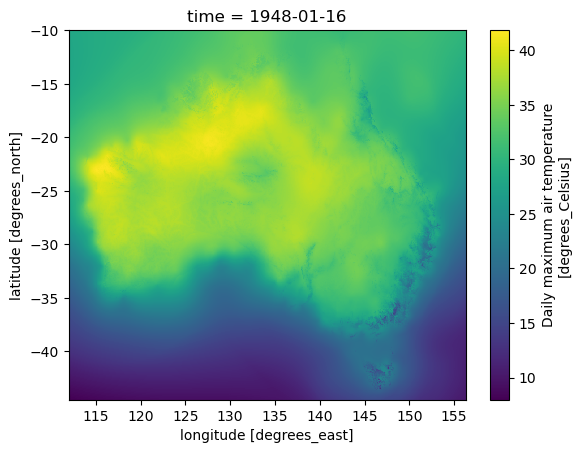

In [8]:
dset[varname].isel(time=0).plot()

### select only complete years 

In [9]:
dset = dset.sel(time=slice(None, '2019'))

### get the mask from AWAP 

In [10]:
awap = xr.open_dataset('/media/nicolasf/END19101/data/PICT/datasets/AWAP/AWAP_monthly_Rain_1972_2014.nc')

In [11]:
mask = awap['mask']

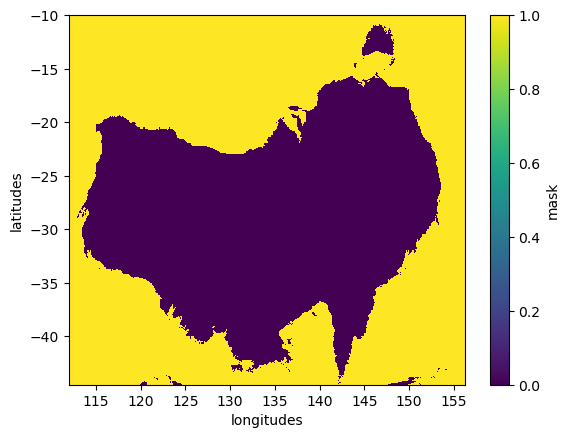

In [12]:
mask.plot()

In [13]:
mask = mask.data

In [14]:
mask = mask[::-1,:]

In [15]:
dset

<xarray.Dataset>
Dimensions:  (time: 864, lat: 691, lon: 886)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-16 1948-02-15 ... 2019-12-16
  * lat      (lat) float32 -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
  * lon      (lon) float32 112.0 112.1 112.1 112.2 ... 156.1 156.1 156.2 156.2
Data variables:
    tmax     (time, lat, lon) float32 7.982 7.991 8.001 ... 29.57 29.55 29.54
Attributes: (12/34)
    geospatial_lat_min:              -44.525
    geospatial_lat_max:              -9.975
    geospatial_lon_min:              111.975
    geospatial_lon_max:              156.275
    time_coverage_start:             1948-01-01T00:00:00
    date_created:                    2018-11-24T03:32:21.842101
    ...                              ...
    description:                     This AGCD data is a snapshot of the oper...
    date_issued:                     2020-12-02 09:15:40
    attribution:                     Data should be cited as : Australian Bur...
    copyright:                       (C) Copyright Commonwealth of Australia ...
    history:                          
    DODS_EXTRA.Unlimited_Dimension:  time

In [16]:
dset['mask'] = (('lat','lon'), mask)

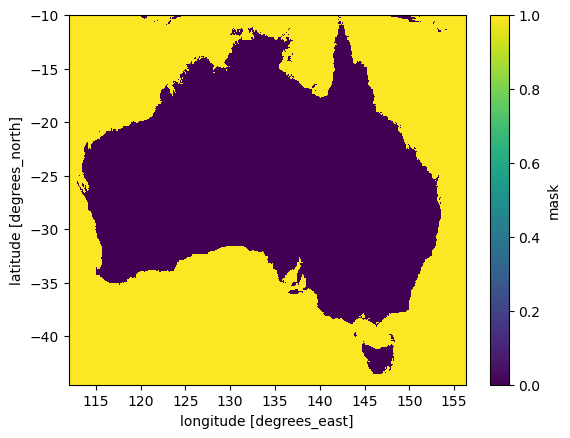

In [17]:
dset['mask'].plot()

In [18]:
mask = dset['mask']

In [19]:
mask = mask.where(mask == 0, other=np.NaN)

In [20]:
mask += 1

In [21]:
dset['mask'] = mask

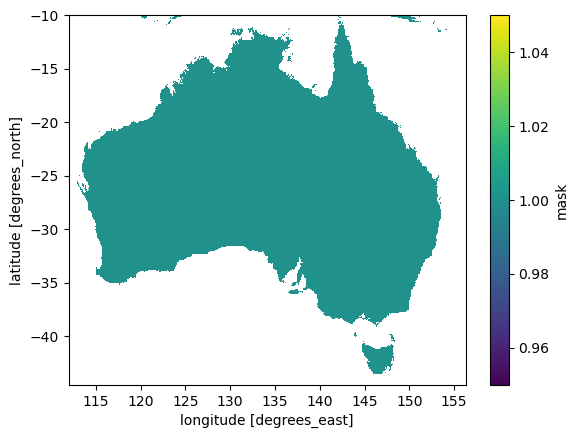

In [22]:
mask.plot()

In [23]:
dset

<xarray.Dataset>
Dimensions:  (time: 864, lat: 691, lon: 886)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-16 1948-02-15 ... 2019-12-16
  * lat      (lat) float32 -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
  * lon      (lon) float32 112.0 112.1 112.1 112.2 ... 156.1 156.1 156.2 156.2
Data variables:
    tmax     (time, lat, lon) float32 7.982 7.991 8.001 ... 29.57 29.55 29.54
    mask     (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/34)
    geospatial_lat_min:              -44.525
    geospatial_lat_max:              -9.975
    geospatial_lon_min:              111.975
    geospatial_lon_max:              156.275
    time_coverage_start:             1948-01-01T00:00:00
    date_created:                    2018-11-24T03:32:21.842101
    ...                              ...
    description:                     This AGCD data is a snapshot of the oper...
    date_issued:                     2020-12-02 09:15:40
    attribution:                     Data should be cited as : Australian Bur...
    copyright:                       (C) Copyright Commonwealth of Australia ...
    history:                          
    DODS_EXTRA.Unlimited_Dimension:  time

In [24]:
if 'crs' in dset.data_vars.keys():
    dset =  dset.drop('crs')

In [25]:
dset = dset.rename({'lat':'latitudes', 'lon':'longitudes', varname:new_varname})

In [26]:
dset.to_netcdf(f'/media/nicolasf/END19101/data/PICT/datasets/AGCD/AGCD_monthly_{new_varname}_1948_2019.nc')

In [27]:
ls /media/nicolasf/END19101/data/PICT/datasets/AGCD/

AGCD_monthly_Rain_1948_2019.nc  AGCD_monthly_TMin_1948_2019.nc
AGCD_monthly_TMax_1948_2019.nc
